In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers

### 多输入多输出

In [2]:
# 多输入
title_input = keras.Input(shape=(None,), name="title")
body_input = keras.Input(shape=(None,), name="body")

title_features = layers.Embedding(10000, 64)(title_input)
body_features = layers.Embedding(10000, 64)(body_input)

tags_input = keras.Input(shape=(12,), name="tags")
title_features = layers.LSTM(128)(title_features)
body_features = layers.LSTM(32)(body_features)
x = layers.concatenate([title_features, body_features, tags_input])

# 多输出
priority_pred = layers.Dense(1, name="priority")(x)
department_pred = layers.Dense(4, name="department")(x)

model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

In [3]:
# When compiling this model, you can assign different losses to each output.
# You can even assign different weights to each loss -- to modulate their contribution to the total training loss.
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[
        keras.losses.BinaryCrossentropy(from_logits=True),
        keras.losses.CategoricalCrossentropy(from_logits=True),
    ],
    loss_weights=[1.0, 0.2],
)

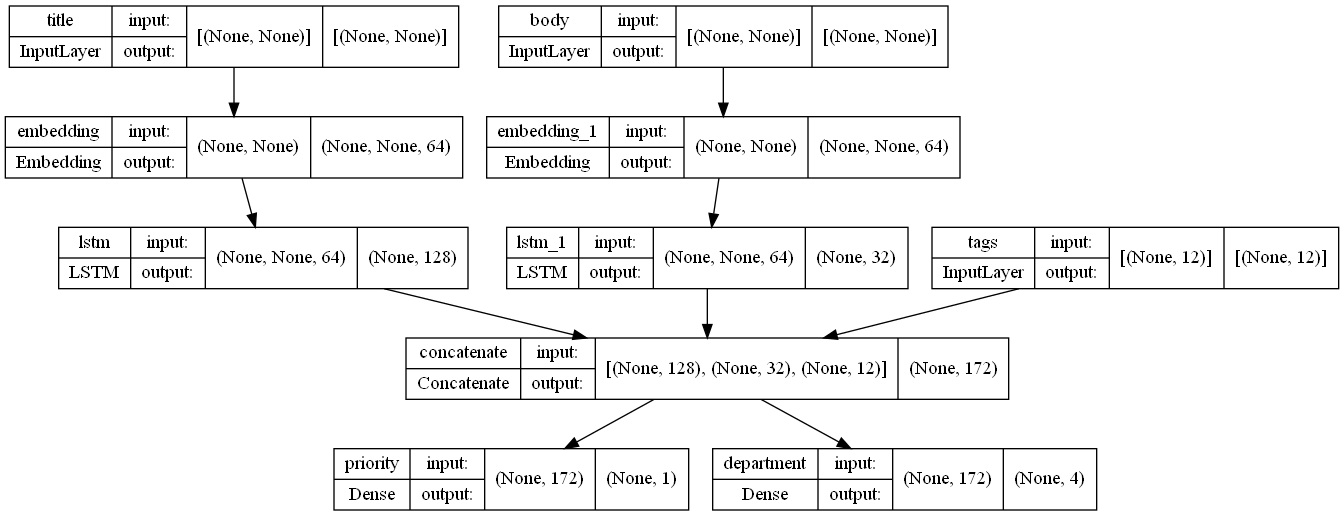

In [4]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)